In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Leitura dos dados

In [ ]:
dictionary = pd.read_csv('/content/drive/MyDrive/Projetos/FMUSP/Dados/Raw/BDIPMamaV11_DataDictionary_2022-05-24.csv')

In [ ]:
dfr_raw = pd.read_csv('/content/drive/MyDrive/Projetos/FMUSP/Dados/Raw/BDIPMamaV11-INTELIRegistroDeTumo_DATA_LABELS_2023-01-24_1924.csv')
dfpa_raw = pd.read_csv('/content/drive/MyDrive/Projetos/FMUSP/Dados/Raw/BDIPMamaV11-INTELIPesoEAltura_DATA_LABELS_2023-01-24_1926.csv')
dfh_raw = pd.read_csv('/content/drive/MyDrive/Projetos/FMUSP/Dados/Raw/BDIPMamaV11-INTELIHistopatologia_DATA_LABELS_2023-01-24_1924.csv')
dfd_raw = pd.read_csv('/content/drive/MyDrive/Projetos/FMUSP/Dados/Raw/BDIPMamaV11-INTELIDemograficosTt_DATA_LABELS_2023-01-24_1922.csv')

### Etapa 1: Análise Exploratória

#### Etapa 1.1: Estrutura da base

Entender primeiro a estrutura: quais são as colunas, tipos, dimensão da tabela, valores únicos

In [ ]:
## Base registro de tumor
dfr_raw.dtypes
dfr_raw.shape
dfr_raw.sample(10)
dfr_raw.nunique()
dfr_raw.isnull().mean() * 100

Record ID                                                               int64
Repeat Instrument                                                      object
Repeat Instance                                                       float64
Data da primeira consulta institucional [dt_pci]                       object
Data do diagnóstico                                                    object
Código da Topografia (CID-O)                                           object
Código da Morfologia de acordo com o CID-O                            float64
Estadio Clínico                                                        object
Grupo de Estadio Clínico                                               object
Classificação TNM Clínico - T                                          object
Classificação TNM Clínico - N                                          object
Classificação TNM Clínico - M                                          object
Metastase ao DIAGNOSTICO - CID-O #1                             

(8949, 33)

,Record ID,Repeat Instrument,Repeat Instance,Data da primeira consulta institucional [dt_pci],Data do diagnóstico,Código da Topografia (CID-O),Código da Morfologia de acordo com o CID-O,Estadio Clínico,Grupo de Estadio Clínico,Classificação TNM Clínico - T,Classificação TNM Clínico - N,Classificação TNM Clínico - M,Metastase ao DIAGNOSTICO - CID-O #1,Metastase ao DIAGNOSTICO - CID-O #2,Metastase ao DIAGNOSTICO - CID-O #3,Metastase ao DIAGNOSTICO - CID-O #4,Data do tratamento,Combinação dos Tratamentos Realizados no Hospital,Ano do diagnóstico,Lateralidade do tumor,Data de Recidiva,Tempo desde o diagnóstico até a primeira recidiva,Local de Recidiva a distancia/ metastase #1 - CID-O - Topografia,Local de Recidiva a distancia/ metastase #2 - CID-O - Topografia,Local de Recidiva a distancia/ metastase #3 - CID-O - Topografia,Local de Recidiva a distancia/ metastase #4 - CID-O - Topografia,Descrição da Morfologia de acordo com o CID-O (CID-O - 3ª edição),Descrição da Topografia,Classificação TNM Patológico - N,Classificação TNM Patológico - T,Com recidiva à distância,Com recidiva regional,Com recidiva local
2240,30951,Registro De Tumores,1.0,2012-07-18,2012-04-26,C509,85003.0,IIA,II,2,0,0,NaN,NaN,NaN,NaN,2012-07-20,Outras combinações,2012.0,Direita,NaN,NaN,NaN,NaN,NaN,NaN,CARCINOMA DUCTAL INFILTRANTE SOE,MAMA SOE (EXCLUI PELE DA MAMA C44.5),NaN,NaN,Não,Não,Não
8537,79099,Registro De Tumores,1.0,2017-12-01,2017-12-05,C504,85753.0,IIIB,NaN,4B,0,0,NaN,NaN,NaN,NaN,2018-02-23,Cirurgia + Radio + Quimio + Hormonio,2018.0,Direita,NaN,NaN,NaN,NaN,NaN,NaN,CARCINOMA METAPLASICO SOE,MAMA QUADRANTE SUPERIOR EXTERNO DA,NaN,NaN,Não,Não,Não
5028,56098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3498,42510,Registro De Tumores,1.0,2014-01-11,2013-11-10,C502,85003.0,IIIB,III,4D,1,0,NaN,NaN,NaN,NaN,2014-02-01,Cirurgia + Radio + Quimio,2014.0,Esquerda,NaN,NaN,NaN,NaN,NaN,NaN,CARCINOMA DUCTAL INFILTRANTE SOE,MAMA QUADRANTE SUPERIOR INTERNO DA,NaN,NaN,Não,Não,Não
8484,78614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2059,29433,Registro De Tumores,1.0,2012-04-16,2012-03-06,C508,85003.0,IIA,II,2,0,0,NaN,NaN,NaN,NaN,2012-05-28,Outras combinações,2012.0,Direita,NaN,NaN,NaN,NaN,NaN,NaN,CARCINOMA DUCTAL INFILTRANTE SOE,MAMA LESAO SOBREPOSTA DA,NaN,NaN,Não,Não,Não
7374,70524,Registro De Tumores,1.0,2017-04-04,2017-03-10,C504,85003.0,IIIA,III,3,1,0,C48 - Tecidos Moles do Retroperitônio e do Per...,NaN,NaN,NaN,2017-04-18,Radioterapia + Quimioterapia,2017.0,Esquerda,NaN,NaN,NaN,NaN,NaN,NaN,CARCINOMA DUCTAL INFILTRANTE SOE,MAMA QUADRANTE SUPERIOR EXTERNO DA,NaN,NaN,Não,Não,Não
4878,55458,Registro De Tumores,2.0,2015-11-30,2015-12-13,C569,83803.0,IIIB,III,X - nao foi possivel determinar,X - nao foi possivel determinar,0,NaN,NaN,NaN,NaN,2015-12-31,Cirurgia + Quimioterapia,2016.0,Esquerda,NaN,NaN,NaN,NaN,NaN,NaN,ADENOCARCINOMA ENDOMETRIOIDE SOE,OVARIO,NaN,NaN,Não,Não,Não
7357,70430,Registro De Tumores,1.0,2017-08-18,2017-07-03,C500,85003.0,IIA,II,2,0,0,NaN,NaN,NaN,NaN,2017-11-11,Cirurgia + Radio + Quimio + Hormonio,2017.0,Esquerda,NaN,NaN,NaN,NaN,NaN,NaN,CARCINOMA DUCTAL INFILTRANTE SOE,MAMA MAMILO,NaN,NaN,Não,Não,Não
5578,59349,Registro De Tumores,1.0,2016-02-08,2015-12-22,C502,85003.0,IV,IV,2,1,1,C40 - Ossos e Cartilagens Articulares Dos Membros,C41 - Ossos e Das Cartilagens Articulares de O...,NaN,NaN,2016-03-28,Outras combinações,2016.0,Direita,2017-04-06,471.0,NaN,NaN,NaN,NaN,CARCINOMA DUCTAL INFILTRANTE SOE,MAMA QUADRANTE SUPERIOR INTERNO DA,NaN,NaN,Não,Sim,Não


Record ID                                                             4272
Repeat Instrument                                                        1
Repeat Instance                                                          8
Data da primeira consulta institucional [dt_pci]                      2561
Data do diagnóstico                                                   2583
Código da Topografia (CID-O)                                            77
Código da Morfologia de acordo com o CID-O                              95
Estadio Clínico                                                         21
Grupo de Estadio Clínico                                                 7
Classificação TNM Clínico - T                                           23
Classificação TNM Clínico - N                                           13
Classificação TNM Clínico - M                                            6
Metastase ao DIAGNOSTICO - CID-O #1                                     16
Metastase ao DIAGNOSTICO 

Record ID                                                              0.000000
Repeat Instrument                                                     47.737177
Repeat Instance                                                       47.737177
Data da primeira consulta institucional [dt_pci]                      47.737177
Data do diagnóstico                                                   47.737177
Código da Topografia (CID-O)                                          47.737177
Código da Morfologia de acordo com o CID-O                            47.737177
Estadio Clínico                                                       47.737177
Grupo de Estadio Clínico                                              50.664879
Classificação TNM Clínico - T                                         47.737177
Classificação TNM Clínico - N                                         47.737177
Classificação TNM Clínico - M                                         47.737177
Metastase ao DIAGNOSTICO - CID-O #1     

In [ ]:
## Base peso altura
dfpa_raw.dtypes
dfpa_raw.shape
dfpa_raw.sample(10)
dfpa_raw.nunique()
dfpa_raw.isnull().mean() * 100

Record ID                    int64
Repeat Instrument           object
Repeat Instance            float64
Data:                       object
Peso                       float64
Altura (em centimetros)    float64
IMC                        float64
dtype: object

(55654, 7)

,Record ID,Repeat Instrument,Repeat Instance,Data:,Peso,Altura (em centimetros),IMC
583,3427,Dados Antropometricos,6.0,2010-12-28,49.60,146.0,23.3
36230,59425,Dados Antropometricos,36.0,2018-06-30,63.00,146.0,29.6
53752,79751,Dados Antropometricos,12.0,2021-09-28,62.05,158.0,24.9
13055,23801,Dados Antropometricos,1.0,2011-12-11,52.40,155.0,21.8
39426,61621,Dados Antropometricos,17.0,2017-07-10,53.60,162.0,20.4
49385,72465,Dados Antropometricos,7.0,2018-10-24,NaN,164.0,0.0
18642,30317,Dados Antropometricos,33.0,2020-03-16,78.75,155.0,32.8
6011,16132,Dados Antropometricos,67.0,2011-09-14,63.00,160.0,24.6
29845,54317,Dados Antropometricos,6.0,2016-08-23,84.45,159.0,33.4
46078,69824,Dados Antropometricos,18.0,2019-11-10,78.50,154.0,33.1


Record ID                  4272
Repeat Instrument             1
Repeat Instance              96
Data:                      4622
Peso                       1831
Altura (em centimetros)     109
IMC                         412
dtype: int64

Record ID                   0.000000
Repeat Instrument           7.675998
Repeat Instance             7.675998
Data:                       7.726309
Peso                       18.823445
Altura (em centimetros)    10.288569
IMC                         7.762245
dtype: float64

In [ ]:
## Base histopatologia
dfh_raw.dtypes
dfh_raw.shape
dfh_raw.sample(10)
dfh_raw.nunique()
dfh_raw.isnull().mean() * 100

Record ID                                       int64
Repeat Instrument                              object
Repeat Instance                               float64
Diagnostico primario (tipo histológico)        object
Grau histológico                              float64
Subtipo tumoral                               float64
Receptor de estrogênio                         object
Receptor de progesterona                       object
Ki67 (>14%)                                    object
Receptor de progesterona (quantificação %)     object
Receptorde Estrogênio (quantificação %)        object
Indice H (Receptorde progesterona)            float64
HER2 por IHC                                   object
HER2 por FISH                                  object
Ki67 (%)                                      float64
dtype: object

(9066, 15)

,Record ID,Repeat Instrument,Repeat Instance,Diagnostico primario (tipo histológico),Grau histológico,Subtipo tumoral,Receptor de estrogênio,Receptor de progesterona,Ki67 (>14%),Receptor de progesterona (quantificação %),Receptorde Estrogênio (quantificação %),Indice H (Receptorde progesterona),HER2 por IHC,HER2 por FISH,Ki67 (%)
7881,72414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7449,70211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8644,78802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4903,55348,Dados Histopatologicos Mama,1.0,NÃO-ESPECIAL - Carcinoma de mama ductal invasi...,2.0,2.0,positivo,positivo,positivo,100,100,300.0,0 (negativo),não realizado,22.0
7825,72057,Dados Histopatologicos Mama,1.0,NÃO-ESPECIAL - Carcinoma de mama ductal invasi...,2.0,4.0,negativo,negativo,positivo,NaN,NaN,NaN,++ (duvidoso),sem amplificação,30.0
2532,34346,Dados Histopatologicos Mama,1.0,NaN,NaN,2.0,positivo,negativo,positivo,NaN,NaN,NaN,0 (negativo),NaN,20.0
117,5660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,5232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7728,71503,Dados Histopatologicos Mama,1.0,NÃO-ESPECIAL - Carcinoma de mama ductal invasi...,NaN,2.0,positivo,positivo,positivo,100,80,NaN,0 (negativo),NaN,20.0
1099,21913,Dados Histopatologicos Mama,1.0,NÃO-ESPECIAL - Carcinoma de mama ductal invasi...,NaN,4.0,negativo,negativo,positivo,NaN,NaN,NaN,0 (negativo),NaN,NaN


Record ID                                     4272
Repeat Instrument                                1
Repeat Instance                                 17
Diagnostico primario (tipo histológico)         18
Grau histológico                                 3
Subtipo tumoral                                  5
Receptor de estrogênio                           3
Receptor de progesterona                         4
Ki67 (>14%)                                      4
Receptor de progesterona (quantificação %)      43
Receptorde Estrogênio (quantificação %)         39
Indice H (Receptorde progesterona)              36
HER2 por IHC                                     5
HER2 por FISH                                    5
Ki67 (%)                                        67
dtype: int64

Record ID                                      0.000000
Repeat Instrument                             47.121112
Repeat Instance                               47.121112
Diagnostico primario (tipo histológico)       67.416722
Grau histológico                              83.818663
Subtipo tumoral                               48.213104
Receptor de estrogênio                        53.132583
Receptor de progesterona                      53.110523
Ki67 (>14%)                                   55.636444
Receptor de progesterona (quantificação %)    79.152879
Receptorde Estrogênio (quantificação %)       76.108537
Indice H (Receptorde progesterona)            93.470108
HER2 por IHC                                  48.720494
HER2 por FISH                                 77.476285
Ki67 (%)                                      57.346128
dtype: float64

In [ ]:
## Base demográfica
dfd_raw.dtypes
dfd_raw.shape
dfd_raw.sample(10)
dfd_raw.nunique()
dfd_raw.isnull().mean() * 100

Record ID                                                                                                                              int64
Repeat Instrument                                                                                                                    float64
Repeat Instance                                                                                                                      float64
Escolaridade                                                                                                                          object
Idade do paciente ao primeiro diagnóstico                                                                                            float64
Sexo                                                                                                                                  object
Raça declarada (Biobanco)                                                                                                             object
UF de nascime

(4272, 48)

,Record ID,Repeat Instrument,Repeat Instance,Escolaridade,Idade do paciente ao primeiro diagnóstico,Sexo,Raça declarada (Biobanco),UF de nascimento do paciente,UF de residência do paciente,Data da última informação sobre o paciente,Última informação do paciente,Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos [dt_pci],Já ficou grávida?,Quantas vezes ficou gráfida?,Número de partos,Idade na primeira gestação,Abortou,Amamentou na primeira gestação?,Por quanto tempo amamentou?,Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Não),"Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 1º grau, apenas 1 caso)","Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 1º grau, mais de 1 caso)","Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 2º grau, apenas 1 caso)","Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 2º grau, mais de 1 caso)",Idade da primeira mentruação,Faz uso de métodos contraceptivo?,Qual método? (choice=Pílula anticoncepcional),Qual método? (choice=DIU),Qual método? (choice=camisinha),Qual método? (choice=outros),Qual método? (choice=não informou),Já fez uso de drogas?,Atividade Física,Consumo de tabaco,Consumo de álcool,Possui histórico familiar de câncer?,"Grau de parentesco de familiar com cancer? (choice=primeiro (pais, irmãos, filhos))","Grau de parentesco de familiar com cancer? (choice=segundo (avós, tios e netos))","Grau de parentesco de familiar com cancer? (choice=terceiro (bisavós, tio avós, primos, sobrinhos))",Regime de Tratamento,Hormonioterapia,Data da cirurgia,Tipo de terapia anti-HER2 neoadjuvante,Radioterapia,Data de início do tratamento quimioterapia,Esquema de hormonioterapia,Data do início Hormonioterapia adjuvante,Data de início da Radioterapia
2196,54254,NaN,NaN,IGNORADA,81.0,Feminino,NaN,NaN,NaN,2017-11-16,"Óbito por outras causas, SOE",912.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,NaN,NaN,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,NaN,NaN,NaN,NaN,NaN,Unchecked,Unchecked,Unchecked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3601,71250,NaN,NaN,ENS. FUNDAMENTAL INCOMPLETO,69.0,Feminino,NaN,NaN,NaN,2018-03-09,Obito por câncer,208.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,NaN,NaN,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,NaN,NaN,NaN,NaN,NaN,Unchecked,Unchecked,Unchecked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2668,59104,NaN,NaN,IGNORADA,62.0,Feminino,NaN,NaN,NaN,2019-06-18,"Vivo, SOE",1240.0,Sim,NaN,NaN,23.0,NaN,Sim,NaN,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,13.0,NaN,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,NaN,Pratica esporadicamente,NaN,NaN,NaN,Unchecked,Unchecked,Unchecked,Terapia Adjuvante,NaN,2016-04-27,NaN,NaN,2016-06-21,NaN,NaN,NaN
3570,70826,NaN,NaN,IGNORADA,38.0,Feminino,Negro,NaN,NaN,2020-06-11,"Vivo, SOE",1105.0,NaN,NaN,NaN,NaN,NaN,Não,NaN,Unchecked,Checked,Unchecked,Unchecked,Unchecked,13.0,NaN,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,NaN,NaN,NaN,NaN,NaN,Unchecked,Unchecked,Unchecked,Terapia Adjuvante,NaN,2017-10-13,Trastuzumabe,NaN,2017-12-28,NaN,NaN,NaN
3561,70788,NaN,NaN,IGNORADA,42.0,Feminino,NaN,NaN,NaN,2019-08-10,Obito por câncer,817.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,NaN,NaN,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,NaN,Não pratica,NaN,NaN,NaN,Unchecked,Unchecked,Unchecked,NaN,NaN,NaN,NaN,Sim,NaN,NaN,NaN,2018-10-18
2990,61995,NaN,NaN,IGNORADA,70.0,Feminino,NaN,NaN,NaN,2019-11-24,"Vivo, SOE",1303.0,Sim,NaN,NaN,17.0,NaN,Sim,24.0,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,12.0,NaN,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,NaN,NaN,NaN,NaN,NaN,Unchecked,Unchecked,Unchecked,NaN,NaN,2016-10-30,NaN,NaN,NaN,NaN,NaN,NaN
24

Record ID                                                                                                                            4272
Repeat Instrument                                                                                                                       0
Repeat Instance                                                                                                                         0
Escolaridade                                                                                                                            6
Idade do paciente ao primeiro diagnóstico                                                                                              76
Sexo                                                                                                                                    2
Raça declarada (Biobanco)                                                                                                               5
UF de nascimento do paciente      

Record ID                                                                                                                              0.000000
Repeat Instrument                                                                                                                    100.000000
Repeat Instance                                                                                                                      100.000000
Escolaridade                                                                                                                           5.032772
Idade do paciente ao primeiro diagnóstico                                                                                              4.213483
Sexo                                                                                                                                   3.441011
Raça declarada (Biobanco)                                                                                                             94

Anotações:



* Variáveis que indicam sucesso ou não tratamento (resultado/resposta): "Data de Recidiva", "Tempo desde o diagnóstico até a primeira recidiva", "Local de Recidiva". Quais outras são relativas à recidiva?
* Variáveis que indicam tipo do tratamento: "Regime de Tratamento", "Hormonioterapia", "Data da cirurgia", "Tipo de terapia anti-HER2 neoadjuvante", "Radioterapia", "Data de início do tratamento quimioterapia", "Esquema de hormonioterapia", "Combinação dos Tratamentos Realizados no Hospital" etc - criar a variável final indicando os tipos de tratamento que queremos categorizar
* Tomar cuidado com RecordID que aparece mais de uma vez, são as mesmas pessoas em momentos diferentes?
* Quais variáveis precisamos converter de object para numérico e vice-versa?



#### Etapa 1.2: Limpeza inicial

Renomear Colunas

In [ ]:
dfr_tratado = dfr_raw.copy().rename(columns={   
                                              'Record ID': 'record_id',
                                              'Repeat Instrument': 'repeat_instrument',
                                              'Repeat Instance': 'repeat_instance',
                                              'Data da primeira consulta institucional [dt_pci]': 'data_da_primeira_consulta_institucional_dt_pci',
                                              'Data do diagnóstico': 'data_do_diagnostico',
                                              'Código da Topografia (CID-O)': 'codigo_da_topografia_cid_o',
                                              'Código da Morfologia de acordo com o CID-O': 'codigo_da_morfologia_cid_o',
                                              'Estadio Clínico  ': 'estadio_clinico',
                                              'Grupo de Estadio Clínico': 'grupo_estadio_clinico',
                                              'Classificação TNM Clínico - T': 'classificacao_tnm_clinico_t',
                                              'Classificação TNM Clínico - N': 'classificacao_tnm_clinico_n',
                                              'Classificação TNM Clínico - M': 'classificacao_tnm_clinico_m',
                                              'Metastase ao DIAGNOSTICO - CID-O #1': 'metastase_diagnostico_cid_o_1',
                                              'Metastase ao DIAGNOSTICO - CID-O #2': 'metastase_diagnostico_cid_o_2',
                                              'Metastase ao DIAGNOSTICO - CID-O #3': 'metastase_diagnostico_id_o_3',
                                              'Metastase ao DIAGNOSTICO - CID-O #4': 'metastase_diagnostico_cid_o_4',
                                              'Data do tratamento': 'data_do_tratamento',
                                              'Combinação dos Tratamentos Realizados no Hospital': 'combinacao_dos_tratamentos_realizados_no_hospital',
                                              'Ano do diagnostico': 'ano_do_diagnostico',
                                              'Lateralidade do tumor': 'lateralidade_do_tumor',
                                              'Data de Recidiva': 'data_recidiva',
                                              'Tempo desde o diagnóstico até a primeira recidiva  ': 'tempo_desde_o_diagnostico_ate_primeira_recidiva_',
                                              'Local de Recidiva a  distancia/ metastase #1 - CID-O - Topografia': 'local_recidiva_a _distancia_metastase_1_cid_o_topografia',
                                              'Local de Recidiva a  distancia/ metastase #2 - CID-O - Topografia': 'local_recidiva_a _distancia_metastase_2_cid_o_topografia',
                                              'Local de Recidiva a  distancia/ metastase #3 - CID-O - Topografia': 'local_recidiva_a _distancia_metastase_3_cid_o_topografia',
                                              'Local de Recidiva a  distancia/ metastase #4 - CID-O - Topografia': 'local_recidiva_a _distancia_metastase_4_cid_o_topografia',
                                              'Descrição da Morfologia de acordo com o CID-O  (CID-O - 3ª edição)': 'descricao_da_morfologia_acordo_com_o_cid_o_cid_o_3_edicao',
                                              'Descrição da Topografia ': 'descricao_da_topografia_',
                                              'Classificação TNM Patológico - N': 'classificacao_tnm_patologico_n',
                                              'Classificação TNM Patológico - T': 'classificacao_tnm_patologico_t',
                                              'Com recidiva à distância': 'com_recidiva_distancia',
                                              'Com recidiva regional': 'com_recidiva_regional',
                                              'Com recidiva local': 'com_recidiva_local'
})

dfpa_tratado = dfpa_raw.copy().rename(columns={
                                                'Record ID': 'record_id',
                                                'Repeat Instrument': 'repeat_instrument',
                                                'Repeat Instance': 'repeat_instance',
                                                'Data: ': 'data',
                                                'Peso': 'peso',
                                                'Altura (em centimetros)': 'altura_em_centimetros',
                                                'IMC': 'imc'
})

dfh_tratado = dfh_raw.copy().rename(columns={
                                              'Record ID': 'record_id',
                                              'Repeat Instrument': 'repeat_instrument',
                                              'Repeat Instance': 'repeat_instance',
                                              'Diagnostico primario (tipo histológico)': 'diagnostico_primario_tipo_histologico',
                                              'Grau histológico': 'grau_histologico',
                                              'Subtipo tumoral': 'subtipo_tumoral',
                                              'Receptor de estrogênio': 'receptor_estrogenio',
                                              'Receptor de progesterona': 'receptor_progesterona',
                                              'Ki67 (>14%)': 'ki67_maior14pct',
                                              'Receptor de progesterona (quantificação %)': 'receptor_progesterona_quantificacao_pct',
                                              'Receptorde Estrogênio (quantificação %)': 'receptorde_estrogenio_quantificacao_pct',
                                              'Indice H (Receptorde progesterona)': 'indice_h_receptorde_progesterona',
                                              'HER2 por IHC': 'her2_por_ihc',
                                              'HER2 por FISH': 'her2_por_fish',
                                              'Ki67 (%)': 'ki67_pct'
})

dfd_tratado = dfd_raw.copy().rename(columns={
                                              'Record ID': 'record_id',
                                              'Repeat Instrument': 'repeat_instrument',
                                              'Repeat Instance': 'repeat_instance',
                                              'Escolaridade': 'escolaridade',
                                              'Idade do paciente ao primeiro diagnóstico': 'idade_do_paciente_primeiro_diagnostico',
                                              'Sexo': 'sexo',
                                              'Raça declarada (Biobanco)': 'raca_declarada_biobanco',
                                              'UF de nascimento do paciente': 'uf_nascimento_do_paciente',
                                              'UF de residência do paciente': 'uf_residencia_do_paciente',
                                              'Data da última informação sobre o paciente': 'data_da_ultima_informacao_sobre_o_paciente',
                                              'Última informação do paciente': 'ultima_informacao_do_paciente',
                                              'Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]': 'tempo_seguimento_em_dias_desde_o_ultimo_tumor_no_caso_tumores_multiplos_dt_pci',
                                              'Já ficou grávida?': 'ja_ficou_gravida',
                                              'Quantas vezes ficou gráfida?': 'quantas_vezes_ficou_gravida',
                                              'Número de partos': 'numero_partos',
                                              'Idade na primeira gestação': 'idade_na_primeira_gestacao',
                                              'Abortou': 'abortou',
                                              'Amamentou na primeira gestação?': 'amamentou_na_primeira_gestacao',
                                              'Por quanto tempo amamentou?': 'por_quanto_tempo_amamentou',
                                              'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Não)': 'historia_familiar_cancer_relacionado_sindrome_cancer_mama_ovario_hereditaria_choice_nao',
                                              'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 1º grau, apenas 1 caso)': 'historia_familiar_cancer_relacionado_sindrome_cancer_mama_ovario_hereditaria_choice_sim_1_grau_apenas_1_caso',
                                              'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 1º grau, mais de 1 caso)': 'historia_familiar_cancer_relacionado_sindrome_cancer_mama_ovario_hereditaria_choice_sim_1_grau_mais_1_caso',
                                              'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 2º grau, apenas 1 caso)': 'historia_familiar_cancer_relacionado_sindrome_cancer_mama_ovario_hereditaria_choice_sim_2_grau_apenas_1_caso',
                                              'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 2º grau, mais de 1 caso)': 'historia_familiar_cancer_relacionado_sindrome_cancer_mama_ovario_hereditaria_choice_sim_2_grau_mais_1_caso',
                                              'Idade da primeira mentruação': 'idade_da_primeira_mentruacao',
                                              'Faz uso de métodos contraceptivo?': 'faz_uso_metodos_contraceptivo',
                                              'Qual método? (choice=Pílula anticoncepcional)': 'qual_metodo_choice_pilula_anticoncepcional',
                                              'Qual método? (choice=DIU)': 'qual_metodo_choice_diu',
                                              'Qual método? (choice=camisinha)': 'qual_metodo_choice_camisinha',
                                              'Qual método? (choice=outros)': 'qual_metodo_choice_outros',
                                              'Qual método? (choice=não informou)': 'qual_metodo_choice_nao_informou',
                                              'Já fez uso de drogas?': 'ja_fez_uso_drogas',
                                              'Atividade Física': 'atividade_fisica',
                                              'Consumo de tabaco': 'consumo_tabaco',
                                              'Consumo de álcool': 'consumo_alcool',
                                              'Possui histórico familiar de câncer?': 'possui_historico_familiar_cancer',
                                              'Grau de parentesco de familiar com cancer? (choice=primeiro (pais, irmãos, filhos))': 'grau_parentesco_familiar_com_cancer_choice_primeiro_pais_irmaos_filhos',
                                              'Grau de parentesco de familiar com cancer? (choice=segundo (avós, tios e netos))': 'grau_parentesco_familiar_com_cancer_choice_segundo_avos_tios_netos',
                                              'Grau de parentesco de familiar com cancer? (choice=terceiro (bisavós, tio avós, primos, sobrinhos))': 'grau_parentesco_familiar_com_cancer_choice_terceiro_bisavos_tio_avos_primos_sobrinhos',
                                              'Regime de Tratamento': 'regime_tratamento',
                                              'Hormonioterapia ': 'hormonioterapia',
                                              'Data da cirurgia': 'data_da_cirurgia',
                                              'Tipo de terapia anti-HER2 neoadjuvante': 'tipo_terapia_anti-her2_neoadjuvante',
                                              'Radioterapia': 'radioterapia',
                                              'Data de início do tratamento quimioterapia': 'data_inicio_do_tratamento_quimioterapia',
                                              'Esquema de hormonioterapia': 'esquema_hormonioterapia',
                                              'Data do início Hormonioterapia adjuvante': 'data_do_inicio_hormonioterapia_adjuvante',
                                              'Data de início da Radioterapia': 'data_inicio_da_radioterapia'
})

**Remover linhas vazias**

`list(df.columns)[1:]` lista todas as colunas do data frame menos a primeira

`drop_na` remove linhas com nulos, `how='all'` só vai remover linha se todas as colunas no subset for nulo para aquela linha, `how='any'` remove linha se pelo menos algum campo da linha for nulo

In [ ]:
dfr_tratado = dfr_tratado.dropna(subset=list(dfr_tratado.columns)[1:], how='all')
dfr_tratado.shape
dfr_tratado.isnull().mean() * 100

(4677, 33)

record_id                                                     0.000000
repeat_instrument                                             0.000000
repeat_instance                                               0.000000
data_da_primeira_consulta_institucional_dt_pci                0.000000
data_do_diagnostico                                           0.000000
codigo_da_topografia_cid_o                                    0.000000
codigo_da_morfologia_cid_o                                    0.000000
estadio_clinico                                               0.000000
grupo_estadio_clinico                                         5.601882
classificacao_tnm_clinico_t                                   0.000000
classificacao_tnm_clinico_n                                   0.000000
classificacao_tnm_clinico_m                                   0.000000
metastase_diagnostico_cid_o_1                                84.755185
metastase_diagnostico_cid_o_2                                91.682703
metast

In [ ]:
dfpa_tratado = dfpa_tratado.dropna(subset=list(dfpa_tratado.columns)[1:], how='all')
dfpa_tratado.shape
dfpa_tratado.isnull().mean() * 100

(51382, 7)

record_id                 0.000000
repeat_instrument         0.000000
repeat_instance           0.000000
data                      0.054494
peso                     12.074267
altura_em_centimetros     2.829785
imc                       0.093418
dtype: float64

In [ ]:
dfh_tratado = dfh_tratado.dropna(subset=list(dfh_tratado.columns)[1:], how='all')
dfh_tratado.shape
dfh_tratado.isnull().mean() * 100

(4794, 15)

record_id                                   0.000000
repeat_instrument                           0.000000
repeat_instance                             0.000000
diagnostico_primario_tipo_histologico      38.381310
grau_histologico                           69.399249
subtipo_tumoral                             2.065081
receptor_estrogenio                        11.368377
receptor_progesterona                      11.326658
ki67_maior14pct                            16.103463
receptor_progesterona_quantificacao_pct    60.575720
receptorde_estrogenio_quantificacao_pct    54.818523
indice_h_receptorde_progesterona           87.651231
her2_por_ihc                                3.024614
her2_por_fish                              57.405090
ki67_pct                                   19.336671
dtype: float64

In [ ]:
dfd_tratado = dfd_tratado.dropna(subset=list(dfd_tratado.columns)[1:], how='all')
dfd_tratado.shape
dfd_tratado.isnull().mean() * 100

(4272, 48)

record_id                                                                                                         0.000000
repeat_instrument                                                                                               100.000000
repeat_instance                                                                                                 100.000000
escolaridade                                                                                                      5.032772
idade_do_paciente_primeiro_diagnostico                                                                            4.213483
sexo                                                                                                              3.441011
raca_declarada_biobanco                                                                                          94.522472
uf_nascimento_do_paciente                                                                                        99.953184
uf_residencia_do

**Converter de categórico (object) para numérico e vice-versa**

*receptor_progesterona_quantificacao_pct* e *receptorde_estrogenio_quantificacao_pct* possuem alguns valores não-numéricos estranhos, temos que ver como tratar (substituir por algum número, deixar nulo?)

In [ ]:
### Categórico para numérico
dfh_tratado.receptor_progesterona_quantificacao_pct.value_counts(dropna=False)
dfh_tratado.receptorde_estrogenio_quantificacao_pct.value_counts(dropna=False)

NaN             2904
100              281
90               281
80               200
40               117
70               112
95               100
20                98
10                89
0                 84
60                83
50                80
neg               66
5                 65
30                60
1                 27
66                22
15                22
98                17
85                17
2                  9
75                 9
25                 8
99                 6
NEG                6
33                 4
8                  3
7                  3
35                 3
4                  3
65                 2
55                 1
6                  1
70%                1
97                 1
28                 1
inconclusivo       1
94                 1
12                 1
20-70              1
9                  1
34                 1
3                  1
93                 1
Name: receptor_progesterona_quantificacao_pct, dtype: int64

NaN     2628
100      715
90       463
95       230
80       150
0         79
70        71
neg       53
60        47
98        45
10        40
40        38
50        36
99        35
20        35
66        28
30        20
5         14
1         12
97         8
85         7
15         6
25         5
2          4
NEG        4
9          3
59         2
12         2
67         2
4          2
75         1
8          1
7          1
23         1
96         1
88         1
3          1
33         1
35         1
1-10       1
Name: receptorde_estrogenio_quantificacao_pct, dtype: int64

********************


In [ ]:
### Numérico para categórico
dfh_tratado.subtipo_tumoral.value_counts(dropna=False, normalize=True)
#dfh_tratado[['subtipo_tumoral']] = dfh_tratado['subtipo_tumoral'].astype(str)

2.0    0.340426
4.0    0.228828
5.0    0.152482
3.0    0.140384
1.0    0.117230
NaN    0.020651
Name: subtipo_tumoral, dtype: float64

Converter object para data

Tratar casos em que mesmo RecordID aparece mais de uma vez

Tratar valores nulos: imputar 0, média, mediana, moda etc

Merge/Join das diferentes tabelas em uma

Criação de variáveis derivadas

In [ ]:
dfr_tratado['teve_recidiva'] = np.where((dfr_tratado['Data de Recidiva'].isnull()), 0, 1)

#### Etapa 1.3: Estatísticas Descritivas

##### **Variáveis Numéricas**

Iremos analisar as estatísticas descritivas das colunas numérica.

In [ ]:
dfr_tratado.describe()

,Record ID,Repeat Instance,Código da Morfologia de acordo com o CID-O,Ano do diagnóstico,Tempo desde o diagnóstico até a primeira recidiva,teve_recidiva
count,4677.000000,4677.000000,4677.000000,4677.000000,1299.000000,4677.000000
mean,48740.243318,1.100919,84865.361343,2014.518495,633.642802,0.277742
std,20830.243502,0.383125,1115.225537,2.717669,535.389453,0.447933
min,302.000000,1.000000,80103.000000,2008.000000,0.000000,0.000000
25%,30836.000000,1.000000,85003.000000,2012.000000,254.000000,0.000000
50%,53504.000000,1.000000,85003.000000,2015.000000,489.000000,0.000000
75%,67369.000000,1.000000,85003.000000,2017.000000,867.500000,1.000000
max,82240.000000,8.000000,99873.000000,2020.000000,3462.000000,1.000000


In [ ]:
dfpa_tratado.describe()

,record_id,repeat_instance,peso,altura_em_centimetros,imc
count,51382.000000,51382.000000,45178.000000,49928.000000,51334.0
mean,45274.715542,11.498599,71.237403,157.195718,inf
std,22418.345632,10.145365,241.738021,7.233985,NaN
min,302.000000,1.000000,1.000000,0.000000,0.0
25%,24133.000000,4.000000,59.650000,152.000000,22.9
50%,50752.000000,9.000000,68.350000,157.000000,27.1
75%,63078.000000,16.000000,78.600000,162.000000,31.2
max,82240.000000,96.000000,51350.000000,191.000000,inf


In [ ]:
dfh_tratado.describe()

,record_id,repeat_instance,grau_histologico,subtipo_tumoral,indice_h_receptorde_progesterona,ki67_pct
count,4794.000000,4794.000000,1467.000000,4695.000000,592.000000,3867.000000
mean,49055.523780,1.135795,2.256987,2.958040,197.089527,36.534264
std,20243.313182,0.635975,0.653522,1.296708,98.485299,24.556049
min,302.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,31635.750000,1.000000,2.000000,2.000000,120.000000,18.000000
50%,54292.500000,1.000000,2.000000,3.000000,240.000000,30.000000
75%,64659.500000,1.000000,3.000000,4.000000,285.000000,50.000000
max,82240.000000,17.000000,3.000000,5.000000,300.000000,100.000000


In [ ]:
dfd_tratado.describe()

,record_id,repeat_instrument,repeat_instance,idade_do_paciente_primeiro_diagnostico,tempo_seguimento_em_dias_desde_o_ultimo_tumor_no_caso_tumores_multiplos_dt_pci,quantas_vezes_ficou_gravida,numero_partos,idade_na_primeira_gestacao,por_quanto_tempo_amamentou,idade_da_primeira_mentruacao
count,4272.000000,0.0,0.0,4092.000000,4270.000000,44.000000,2.000000,897.000000,688.000000,1025.000000
mean,48652.360487,NaN,NaN,54.247801,1475.003747,2.318182,1.500000,23.057971,19.043605,12.891707
std,20659.519622,NaN,NaN,13.574088,859.622377,1.410471,0.707107,5.665232,23.105060,2.104446
min,302.000000,NaN,NaN,22.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,31013.000000,NaN,NaN,45.000000,956.250000,1.000000,1.250000,19.000000,6.000000,12.000000
50%,53394.000000,NaN,NaN,54.000000,1282.000000,2.000000,1.500000,22.000000,12.000000,13.000000
75%,65816.750000,NaN,NaN,64.000000,1817.750000,3.000000,1.750000,26.000000,24.000000,14.000000
max,82240.000000,NaN,NaN,98.000000,4503.000000,7.000000,2.000000,53.000000,260.000000,37.000000


Comentários:


*   Item de lista
*   Item de lista



##### **Variáveis Categóricas**

Vamos ver a distribuição de categorias para algumas variáveis selecionadas em cada

Anotações:

`list(df.select_dtypes(include=['object']).columns)` lista colunas categóricas

In [ ]:
for col in ['estadio_clinico', 'grupo_estadio_clinico', 'combinacao_dos_tratamentos_realizados_no_hospital', 'lateralidade_do_tumor', 'com_recidiva_regional', 'com_recidiva_local' ]:
  print(f'\n\n{col}: \n')
  dfr_tratado[col].value_counts(dropna=False, normalize=True)



estadio_clinico: 



IIA                               0.204618
IIB                               0.156083
IIIA                              0.156083
IV                                0.123370
IIIB                              0.101988
IA                                0.100706
I                                 0.065427
IIIC                              0.040411
0                                 0.022878
IB                                0.009194
Y: NA                             0.005987
II                                0.003635
III                               0.003421
IVB                               0.001924
IVA                               0.001710
X: não foi possível determinar    0.001497
0A                                0.000214
IB1                               0.000214
IVC                               0.000214
IIC                               0.000214
IB2                               0.000214
Name: estadio_clinico, dtype: float64



grupo_estadio_clinico: 



II                                 0.350011
III                                0.284798
I                                  0.166987
IV                                 0.118024
NaN                                0.056019
0                                  0.017746
Y: Na                              0.005131
X - nao foi possivel determinar    0.001283
Name: grupo_estadio_clinico, dtype: float64



combinacao_dos_tratamentos_realizados_no_hospital: 



Outras combinações                      0.411375
Cirurgia + Radio + Quimio + Hormonio    0.196493
Cirurgia + Radio + Quimio               0.126363
Quimioterapia                           0.080393
Radioterapia + Quimioterapia            0.073979
Cirurgia + Quimioterapia                0.039341
Cirurgia                                0.038272
Nenhum tratamento                       0.016036
Cirurgia + Radioterapia                 0.011332
Radioterapia                            0.006414
Name: combinacao_dos_tratamentos_realizados_no_hospital, dtype: float64



lateralidade_do_tumor: 



Esquerda         0.494120
Direita          0.441950
não se aplica    0.063502
Bilateral        0.000428
Name: lateralidade_do_tumor, dtype: float64



com_recidiva_regional: 



Não    0.939919
Sim    0.060081
Name: com_recidiva_regional, dtype: float64



com_recidiva_local: 



Não    0.923028
Sim    0.076972
Name: com_recidiva_local, dtype: float64

In [ ]:
for col in ['diagnostico_primario_tipo_histologico', 'receptor_estrogenio', 'receptor_progesterona']:
  print(f'\n\n{col}: \n')
  dfh_tratado[col].value_counts(dropna=False, normalize=True)



diagnostico_primario_tipo_histologico: 



NÃO-ESPECIAL - Carcinoma de mama ductal invasivo (CDI)/SOE     0.552774
NaN                                                            0.383813
Carcinoma de mama lobular invasivo                             0.016896
outros                                                         0.012307
Carcinoma de mama metaplasico                                  0.008135
Carcinoma de mama mucinoso                                     0.006258
Carcinoma de mama papilifero                                   0.004380
Carcinoma de mama medular                                      0.003338
Carcinoma de mama micropapilar                                 0.002503
Carcinoma de mama misto (ductal e lobular) invasivo            0.001669
Carcinoma mamário invasivo multifocal                          0.001460
Carcinoma de mama cistico adenoide                             0.001460
Carcinoma de mama misto (ductal e micropapilífero) invasivo    0.001252
Carcinoma de mama lobular in situ                              0



receptor_estrogenio: 



positivo         0.604088
negativo         0.282019
NaN              0.113684
não realizado    0.000209
Name: receptor_estrogenio, dtype: float64



receptor_progesterona: 



positivo         0.521485
negativo         0.361285
NaN              0.113267
inconclusivo     0.003755
não realizado    0.000209
Name: receptor_progesterona, dtype: float64

In [ ]:
for col in ['escolaridade', 'sexo', 'raca_declarada_biobanco', 'uf_residencia_do_paciente', 'ultima_informacao_do_paciente', 'ja_ficou_gravida', 
            'possui_historico_familiar_cancer', 'faz_uso_metodos_contraceptivo', 'atividade_fisica', 'consumo_tabaco', 'consumo_alcool', 'regime_tratamento',
            'hormonioterapia', 'tipo_terapia_anti-her2_neoadjuvante', 'radioterapia', 'esquema_hormonioterapia']:
  print(f'\n\n{col}: \n')
  dfd_tratado[col].value_counts(dropna=False, normalize=True)



escolaridade: 



IGNORADA                       0.593399
ENSINO MÉDIO                   0.114232
ENS. FUNDAMENTAL INCOMPLETO    0.104167
ENS. FUNDAMENTAL COMPLETO      0.083567
NaN                            0.050328
SUPERIOR                       0.040730
ANALFABETO                     0.013577
Name: escolaridade, dtype: float64



sexo: 



Feminino     0.957397
NaN          0.034410
Masculino    0.008193
Name: sexo, dtype: float64



raca_declarada_biobanco: 



NaN         0.945225
Branco      0.023408
Pardo       0.016620
Negro       0.010534
Outro       0.003043
Asiático    0.001170
Name: raca_declarada_biobanco, dtype: float64



uf_residencia_do_paciente: 



NaN    0.999532
SP     0.000468
Name: uf_residencia_do_paciente, dtype: float64



ultima_informacao_do_paciente: 



Vivo, SOE                       0.658942
Obito por câncer                0.264747
Vivo, com câncer                0.055009
Óbito por outras causas, SOE    0.020833
NaN                             0.000468
Name: ultima_informacao_do_paciente, dtype: float64



ja_ficou_gravida: 



NaN    0.762875
Sim    0.234551
Não    0.002575
Name: ja_ficou_gravida, dtype: float64



possui_historico_familiar_cancer: 



NaN    0.955524
Sim    0.032303
Não    0.012172
Name: possui_historico_familiar_cancer, dtype: float64



faz_uso_metodos_contraceptivo: 



NaN    0.999298
Não    0.000468
Sim    0.000234
Name: faz_uso_metodos_contraceptivo, dtype: float64



atividade_fisica: 



NaN                        0.928605
Não pratica                0.052200
Pratica regularmente       0.010066
Pratica esporadicamente    0.005384
Pratica frequentemente     0.003745
Name: atividade_fisica, dtype: float64



consumo_tabaco: 



NaN                 0.950375
Nunca fumou         0.034644
Fumou no passado    0.007959
Fuma atualmente     0.006320
não-informado       0.000702
Name: consumo_tabaco, dtype: float64



consumo_alcool: 



NaN                 0.952247
Nunca bebeu         0.037219
Bebia no passado    0.008193
Bebe atualmente     0.001404
não-informado       0.000936
Name: consumo_alcool, dtype: float64



regime_tratamento: 



Terapia Adjuvante        0.332865
NaN                      0.329822
Terapia Neoadjuvante     0.315075
Paliativo                0.016386
Não fez quimioterapia    0.005852
Name: regime_tratamento, dtype: float64



hormonioterapia: 



NaN          0.999298
Adjuvante    0.000702
Name: hormonioterapia, dtype: float64



tipo_terapia_anti-her2_neoadjuvante: 



NaN                           0.734551
Trastuzumabe                  0.264513
Trastuzumabe + Pertuzumabe    0.000936
Name: tipo_terapia_anti-her2_neoadjuvante, dtype: float64



radioterapia: 



Sim    0.544242
NaN    0.455758
Name: radioterapia, dtype: float64



esquema_hormonioterapia: 



NaN                                 0.997191
Inibidor de aromatase isolado       0.001170
Switch: tamoxifeno seguido de IA    0.000936
Tamoxifeno isolado                  0.000702
Name: esquema_hormonioterapia, dtype: float64

In [ ]:
dfd_tratado.select_dtypes(include=['object']).columns

Index(['escolaridade', 'sexo', 'raca_declarada_biobanco',
       'uf_nascimento_do_paciente', 'uf_residencia_do_paciente',
       'data_da_ultima_informacao_sobre_o_paciente',
       'ultima_informacao_do_paciente', 'ja_ficou_gravida', 'abortou',
       'amamentou_na_primeira_gestacao',
       'historia_familiar_cancer_relacionado_sindrome_cancer_mama_ovario_hereditaria_choice_nao',
       'historia_familiar_cancer_relacionado_sindrome_cancer_mama_ovario_hereditaria_choice_sim_1_grau_apenas_1_caso',
       'historia_familiar_cancer_relacionado_sindrome_cancer_mama_ovario_hereditaria_choice_sim_1_grau_mais_1_caso',
       'historia_familiar_cancer_relacionado_sindrome_cancer_mama_ovario_hereditaria_choice_sim_2_grau_apenas_1_caso',
       'historia_familiar_cancer_relacionado_sindrome_cancer_mama_ovario_hereditaria_choice_sim_2_grau_mais_1_caso',
       'faz_uso_metodos_contraceptivo',
       'qual_metodo_choice_pilula_anticoncepcional', 'qual_metodo_choice_diu',
       'qual_metodo_cho

#### Etapa 1.4: Gráficos Iniciais


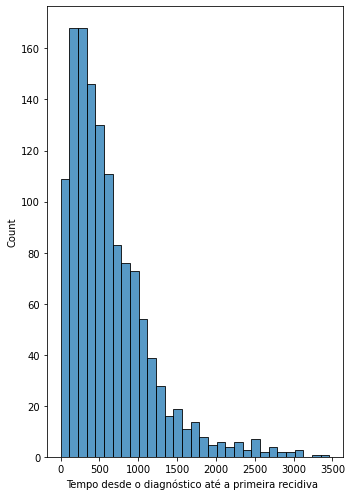

In [ ]:
### Analisar distribuição de resultados de recidiva
sns.histplot(
    dfr_tratado,
    x="Tempo desde o diagnóstico até a primeira recidiva  "
)
plt.tight_layout()
plt.rcParams['figure.figsize']=(4,7)
plt.savefig('distribuicao_tempo_diagnostico_recidiva.png')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

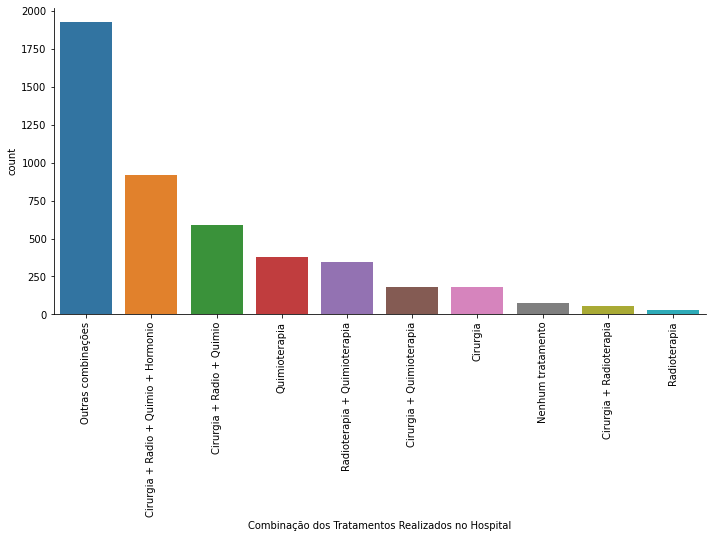

In [ ]:
### Analisar distribuição de tratamentos
sns.catplot(
    data=dfr_tratado,
    x="Combinação dos Tratamentos Realizados no Hospital",
    kind="count",
    order = dfr_tratado['Combinação dos Tratamentos Realizados no Hospital'].value_counts().index,
    aspect=2
)
plt.xticks(rotation=90)
plt.savefig('distribuicao_combinacao_tratamentos.png', bbox_inches="tight")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

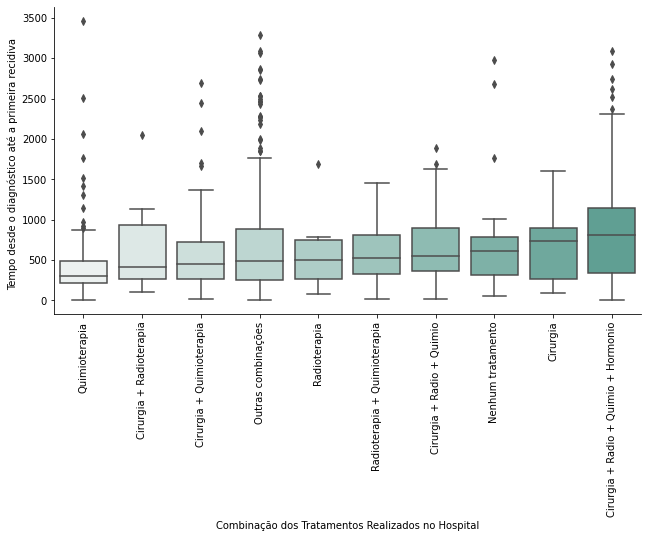

In [ ]:
### Analisar relação da recidiva com tratamento
sns.catplot(data=dfr_tratado, 
            x="Combinação dos Tratamentos Realizados no Hospital", 
            y="Tempo desde o diagnóstico até a primeira recidiva  ", 
            kind="box",
            order=dfr_tratado.groupby(["Combinação dos Tratamentos Realizados no Hospital"]).median()["Tempo desde o diagnóstico até a primeira recidiva  "].sort_values().index,
            palette="light:#5A9",
            aspect=2
)
plt.xticks(rotation=90)
plt.savefig('relacao_temporecidiva_combinacao_tratamento.png', bbox_inches="tight")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

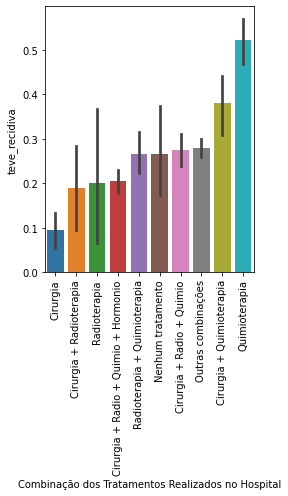

In [ ]:
#### Proporção de recidiva por combinação de tratamento
dfr_tratado['teve_recidiva'] = np.where((dfr_tratado['Data de Recidiva'].isnull()), 0, 1)

sns.barplot(
    data=dfr_tratado,
    x="Combinação dos Tratamentos Realizados no Hospital",
    y="teve_recidiva",
    order=dfr_tratado.groupby(["Combinação dos Tratamentos Realizados no Hospital"]).mean()["teve_recidiva"].sort_values().index
)
plt.xticks(rotation=90)
plt.tight_layout()
plt.rcParams['figure.figsize']=(5,7)
plt.savefig('proporcao_recidiva_por_tratamento.png')